In [1]:
from symbolfit.symbolfit import *

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


# Dataset

Five inputs are needed, which can be python lists or numpy arrays (more options will be added in future!):
1. ``x``: independent variable (bin center location).
2. ``y``: dependent variable.
3. ``y_up``: upward uncertainty in y per bin.
4. ``y_down``: downward uncertainty in y per bin.
5. ``bin_widths_1d`` bin widths in x.
- Elements in both y_up and y_down should be non-negative values.
- These values are the "delta" in y,
  - y + y_up = y shifted up by one standard deviation.
  - y - y_down = y shifted down by one standard deviation.
- If no uncertainty in the dataset, one can set both y_up and y_down to ones with the same shape as x.

In [2]:
'''
CMS search for high-mass dijet resonances at sqrt(s) = 13 TeV
    https://arxiv.org/abs/1911.03947
    https://doi.org/10.1007/JHEP05(2020)033

Differential dijet spectrum (Figure 5), public data taken from HEPDATA
    https://www.hepdata.net/record/ins1764471
'''

x=[1568.5, 1647.0, 1728.5, 1813.0, 1900.5, 1991.0, 2084.5, 2181.5, 2281.5, 2385.0, 2492.0, 2602.5, 2717.0, 2835.0, 2957.0, 3083.0, 3213.0, 3347.5, 3487.0, 3631.0, 3779.0, 3932.0, 4090.5, 4254.0, 4423.0, 4597.5, 4777.5, 4963.5, 5155.5, 5354.0, 5559.0, 5770.0, 5988.0, 6213.5, 6446.0, 6686.0, 6934.0, 7190.0, 7454.5, 7727.5, 8009.0, 8452.0]
y=[149.27999877929688, 109.44000244140625, 80.0770034790039, 58.715999603271484, 43.082000732421875, 31.559999465942383, 23.219999313354492, 16.982999801635742, 12.36400032043457, 9.121100425720215, 6.679200172424316, 4.889999866485596, 3.589400053024292, 2.5933001041412354, 1.902999997138977, 1.3653000593185425, 0.9902999997138977, 0.7092800140380859, 0.5142099857330322, 0.3630400002002716, 0.26298001408576965, 0.18937000632286072, 0.12946000695228577, 0.08928799629211426, 0.06131099909543991, 0.04499199986457825, 0.03179299831390381, 0.021355999633669853, 0.013650000095367432, 0.009144900366663933, 0.005454500205814838, 0.0038403000216931105, 0.0025553000159561634, 0.0015561999753117561, 0.0010168999433517456, 0.0005365100223571062, 0.00023088000307325274, 0.00022378000721801072, 0.00021629000548273325, 0.0, 7.628699677297845e-05, 1.2120999599574134e-05]
y_up=[0.11884000152349472, 0.09983699768781662, 0.08385500311851501, 0.07055199891328812, 0.0594169981777668, 0.05002899840474129, 0.042238999158144, 0.03539599850773811, 0.029911000281572342, 0.025085000321269035, 0.021276000887155533, 0.017805000767111778, 0.015064000152051449, 0.012597999535501003, 0.010623999871313572, 0.008864900097250938, 0.007441999856382608, 0.006189499981701374, 0.005183400120586157, 0.004302599932998419, 0.003619600087404251, 0.0030181999318301678, 0.002463799901306629, 0.002022000029683113, 0.0016528000123798847, 0.001401199959218502, 0.001164300017990172, 0.0009455800172872841, 0.0007514799945056438, 0.0006105700158514082, 0.0004726200131699443, 0.0003963200142607093, 0.0003233299939893186, 0.0002555900136940181, 0.00020963999850209802, 0.00015859999984968454, 0.00011385999823687598, 0.00011036000068997964, 0.00010666000162018463, 4.726000042865053e-05, 7.420800102408975e-05, 2.787400080705993e-05]
y_down=[0.11874999850988388, 0.09974599629640579, 0.08376699686050415, 0.07046700268983841, 0.059335000813007355, 0.049949999898672104, 0.042162999510765076, 0.035321999341249466, 0.02983899973332882, 0.02501700073480606, 0.02120799943804741, 0.017741000279784203, 0.015002000145614147, 0.012536999769508839, 0.010564999654889107, 0.008807900361716747, 0.0073866997845470905, 0.006136199925094843, 0.00513189984485507, 0.0042524999007582664, 0.0035707999486476183, 0.0029712000396102667, 0.002418200019747019, 0.0019777000416070223, 0.0016099000349640846, 0.001359499990940094, 0.0011238999431952834, 0.0009062800090759993, 0.0007132000173442066, 0.0005734399892389774, 0.0004362500039860606, 0.0003607299877330661, 0.00028870999813079834, 0.00022154999896883965, 0.00017612999363336712, 0.00012527000217232853, 7.989699952304363e-05, 7.743899914203212e-05, 7.484800153179094e-05, -0.0, 4.151900066062808e-05, 1.0026999916590285e-05]
bin_widths_1d=[77.0, 80.0, 83.0, 86.0, 89.0, 92.0, 95.0, 99.0, 101.0, 106.0, 108.0, 113.0, 116.0, 120.0, 124.0, 128.0, 132.0, 137.0, 142.0, 146.0, 150.0, 156.0, 161.0, 166.0, 172.0, 177.0, 183.0, 189.0, 195.0, 202.0, 208.0, 214.0, 222.0, 229.0, 236.0, 244.0, 252.0, 260.0, 269.0, 277.0, 286.0, 600.0]

Plot the dataset to see what we will be fitting to:

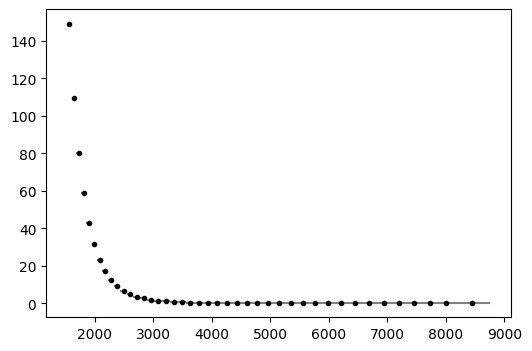

In [3]:
fig, axes = plt.subplots(figsize = (6, 4))
plt.errorbar(np.array(x).flatten(),
             np.array(y).flatten(),
             yerr = [np.array(y_down).flatten(), np.array(y_up).flatten()],
             xerr = np.array(bin_widths_1d)/2,
             fmt = '.', c = 'black', ecolor = 'grey', capsize = 0,
            )
plt.savefig('img/dijet/dataset.png')

This is a steeply falling shape, let's plot in log scale:

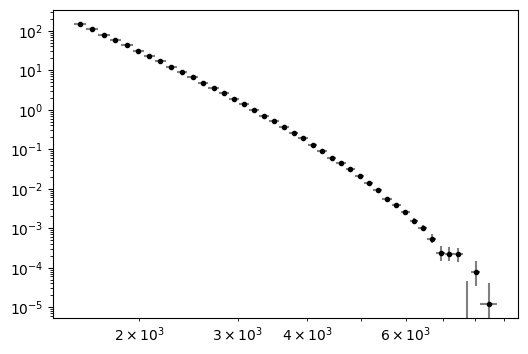

In [4]:
fig, axes = plt.subplots(figsize = (6, 4))
plt.errorbar(np.array(x).flatten(),
             np.array(y).flatten(),
             yerr = [np.array(y_down).flatten(), np.array(y_up).flatten()],
             xerr = np.array(bin_widths_1d)/2,
             fmt = '.', c = 'black', ecolor = 'grey', capsize = 0,
            )
plt.xscale('log')
plt.yscale('log')
plt.savefig('img/dijet/dataset_log.png')

# Configure the fit

Configure PySR to define the function space being searched for with symbolic regression:

In [5]:
from pysr import PySRRegressor

pysr_config = PySRRegressor(
    model_selection = 'accuracy',
    niterations = 200,
    maxsize = 80,
    binary_operators = [
        '+', '*', '/', '^'
                     ],
    unary_operators = [
        'exp',
        'tanh',
    ],
    nested_constraints = {
        'exp':    {'exp': 0, 'tanh': 0, '*': 2, '/': 1, '^': 1},
        'tanh':   {'exp': 0, 'tanh': 0, '*': 2, '/': 1, '^': 1},
        '*':      {'exp': 1, 'tanh': 1, '*': 2, '/': 1, '^': 1},
        '^':      {'exp': 1, 'tanh': 1, '*': 2, '/': 1, '^': 0},
        '/':      {'exp': 1, 'tanh': 1, '*': 2, '/': 0, '^': 1},
    },
    loss='loss(y, y_pred, weights) = (y - y_pred)^2 * weights',
)

Here, we allow four binary operators (+, *, /, pow) and two unary operators (exp, tanh) when searching for functional forms. The custom-defined gauss in the previous example may not be needed here since it this dataset is not obvious with a peak.

Nested constraints are imposed to prohibit, e.g., exp(exp(x))...

Loss function is a weighted MSE, where the weight is the sqaured uncertainty by default in SymbolFit.

For PySR options, please see:
- https://github.com/MilesCranmer/PySR
- https://astroautomata.com/PySR/

Configure SymbolFit with the PySR config and for the re-optimization process:

In [6]:
model = SymbolFit(
        # Dataset: x, y, y_up, y_down.
    	x = x,
    	y = y,
    	y_up = y_up,
    	y_down = y_down,
    
        # PySR configuration of the function space.
    	pysr_config = pysr_config,
    
        # Constrain the maximum function size and over-write maxsize in pysr_config.
        # Set a higher value for more complex shape, or when the lower one does not fit well.
    	max_complexity = 80,
    
        # Whether to scale input x to be within 0 and 1 for the fits for numerical stability,
        # as large x could lead to overflow when there is e.g. exp(x) -> exp(10000).
        # So set this to False when your x's are or close to O(1), otherwise recommended to set True.
        # After the fits, the functions will be unscaled to relect the original dataset.
    	input_rescale = True,
        # ^ scaling needed here since the input x is O(1000).
    
        # Whether to scale y for the fits for numerical stability,
        # options are (when input_rescale is True): None / 'mean' / 'max' / 'l2'.
        # This is useful to stabilize fits when your y's are very large or very small.
        # After the fits, the functions will be unscaled to relect the original dataset.
    	scale_y_by = None,
        # ^ scaling may or may not be needed here since the input y is widely spreading and not too extreme.
    
        # Set a maximum standard error (%) for all parameters to avoid bad fits during re-optimization.
        # In the refit loop, when any of the parameters returns a standard error larger than max_stderr,
        # the fit is considered failed, and the fit will retry itself for fewer or other combination of varying parameters,
        # by freezing some of the parameters to their initial values and kept fixed during re-optimization.
        # This is to avoid bad fits when the objective is too complex to minimize, which could cause some parameters
        # to have unrealistically large standard errors.
        # In most cases 10 < max_stderr < 100 suffices.
    	max_stderr = 20,
    
        # Consider y_up and y_down to weight the MSE loss during SR search and re-optimization.
    	fit_y_unc = True,
    
        # Set a random seed for returning the same batch of functional forms every time (single-threaded),
        # otherwise set None to explore more functions every time (multi-threaded and faster).
        # In most cases the function space is huge, one can retry the fits with the exact same fit configuration
        # and get completely different sets of candidate functions, merely by using different random seeds.
        # So if the candidate functions are not satisfactory this time, rerun it few times more with
        # random_seed = None or a different seed each time.
    	random_seed = None,
    
        # Custome loss weight to set "(y - y_pred)^2 * loss_weights", overwriting that with y_up and y_down.
    	loss_weights = None
)

# Symbol Fit it!

Run the fits: SR fit for functional form searching -> parameterization -> re-optimization fit for improved best-fits and uncertainty estimation -> evaluation.

In [7]:
model.fit()

Compiling Julia backend...


[ Info: Started!



Expressions evaluated per second: 7.060e+05
Head worker occupation: 12.0%
Progress: 1547 / 3000 total iterations (51.567%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           8.928e-01  1.594e+01  y = x₀
2           2.881e-03  5.736e+00  y = tanh(0.00032844)
3           2.772e-03  3.827e-02  y = 0.0010959 ^ x₀
5           6.796e-04  7.030e-01  y = 1.1113e-06 ^ (x₀ + -0.30779)
7           2.240e-05  1.706e+00  y = ((9.6498e-06 * 8.8462e-06) ^ x₀) / 0.0071533
8           1.155e-05  6.625e-01  y = (2.9136e-06 ^ tanh(x₀ * 1.8536)) / 0.0070992
9           5.175e-06  8.028e-01  y = ((x₀ * 7.8188e-05) ^ (x₀ + x₀)) / 0.0067708
10          3.924e-06  2.769e-01  y = ((7.3959e-05 * x₀) ^ (tanh(x₀) + x₀)) / 0.0067708
11          2.754e-06  3.538e-01  y = ((7.3959e-05 * x₀) ^ (tanh(x₀) + tanh(x₀))) / 0.0067708
13          2.541e-06  4.036e-02  y = (((0.0071716 * x₀) ^ ((x₀ * 2.3772) 

## Save results to output files

Save results to csv tables:
- ``candidates.csv``: saves all candidate functions and evaluations in a csv table.
- ``candidates_reduced.csv``: saves a reduced version for essential information without intermediate results.

In [8]:
model.save_to_csv(output_dir = 'output_dijet/')

Saving full results >>> output_dijet/candidates.csv
Saving reduced results >>> output_dijet/candidates_reduced.csv


Plot results to pdf files:
- ``candidates.pdf``: plots all candidate functions with associated uncertainties one by one for fit quality evaluation.
- ``candidates_sampling.pdf``: plots all candidate functions with total uncertainty coverage generated by sampling parameters.
- ``candidates_gof.pdf``: plots the goodness-of-fit scores.
- ``candidates_correlation.pdf``: plots the correlation matrices for the parameters of the candidate functions.

Plotting candidate functions 26/26 >>> output_dijet/candidates.pdf
Plotting candidate functions (sampling parameters) 26/26 >>> output_dijet/candidates_sampling.pdf
Plotting correlation matrices 26/26 >>> output_dijet/candidates_correlation.pdf
Plotting goodness-of-fit scores >>> output_dijet/candidates_gof.pdf


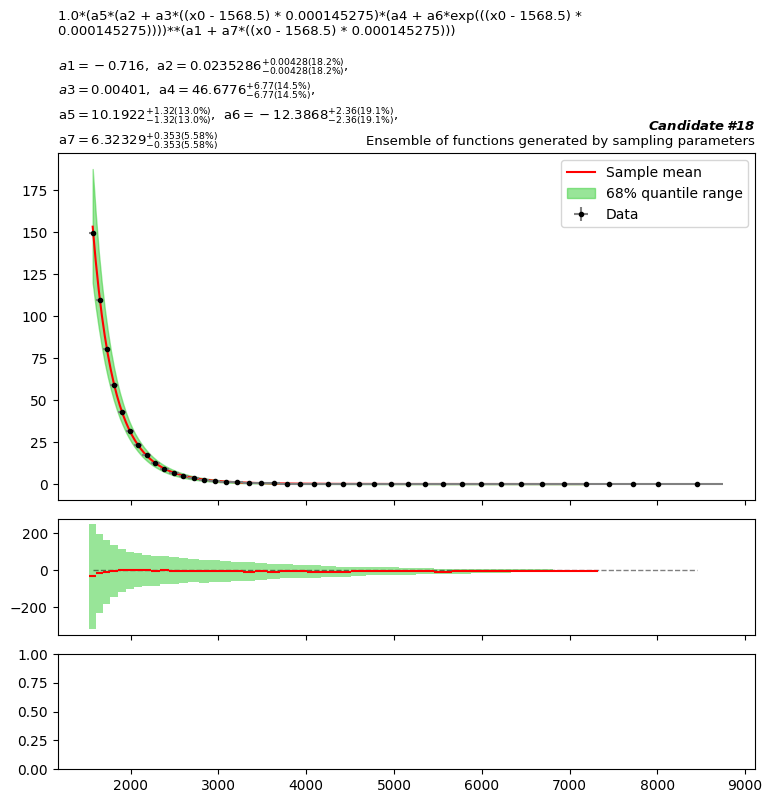

In [9]:
model.plot_to_pdf(
    	output_dir = 'output_dijet/',
    	bin_widths_1d = bin_widths_1d,
    	#bin_edges_2d = bin_edges_2d,
    	plot_logy = True,
    	plot_logx = True,
        sampling_95quantile = False
)